In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl
import pandas as pd
from statsmodels.stats.multitest import fdrcorrection

# Load LDSC rg log files

In [2]:
#ldsc_log_file_list = ["ldscrg.log"] 

#ldsc = gl.read_ldsc(ldsc_log_file_list, mode="rg")

# Load sample data

Sample data source: Kanai, M., Akiyama, M., Takahashi, A., Matoba, N., Momozawa, Y., Ikeda, M., ... & Kamatani, Y. (2018). Genetic analysis of quantitative traits in the Japanese population links cell types to complex human diseases. Nature genetics, 50(3), 390-400.

In [3]:
ldsc = pd.read_csv("toy_data/input_rg.txt",sep="\t")
ldsc

,p1_category,p1,p2_category,p2,rg,se,z,p,q
0,Anthropometric,Height,Anthropometric,BMI,-0.0587,0.0240,-2.4421,0.014602,0.136798
1,Anthropometric,Height,Metabolic,TC,-0.0778,0.0344,-2.2634,0.023611,0.188695
2,Anthropometric,Height,Metabolic,HDL-C,-0.0045,0.0364,-0.1230,0.902080,0.971590
3,Anthropometric,Height,Metabolic,LDL-C,-0.1245,0.0426,-2.9228,0.003469,0.050126
4,Anthropometric,Height,Metabolic,TG,-0.0426,0.0309,-1.3792,0.167820,0.523652
...,...,...,...,...,...,...,...,...,...
3911,Other,Pollinosis,Tumor,PrCa,0.3250,0.1433,2.2683,0.023300,0.187944
3912,Other,Pollinosis,Tumor,UF,0.2163,0.1756,1.2315,0.218100,0.596616
3913,Other,Pollinosis,Other,Urolithiasis,0.0664,0.1794,0.3701,0.711300,0.903018
3914,Other,Urolithiasis,Allergic disease,AD,-0.0821,0.1592,-0.5159,0.605890,0.863730


## trait list

In [4]:
trait =  pd.read_csv("toy_data/trait_list.txt",sep="\t")
trait["order"] = range(len(trait))
trait

,CATEGORY,TRAIT,COLOR,order
0,Anthropometric,Height,#4C72AE,0
1,Anthropometric,BMI,#4C72AE,1
2,Metabolic,TC,#E4812F,2
3,Metabolic,HDL-C,#E4812F,3
4,Metabolic,LDL-C,#E4812F,4
...,...,...,...,...
84,Other,Glaucoma,#FFFFFF,84
85,Other,COPD,#FFFFFF,85
86,Other,Epilepsy,#FFFFFF,86
87,Other,Pollinosis,#FFFFFF,87


## filter the data

In [5]:
order = trait["TRAIT"].values
trait_set1 = trait.loc[trait["order"]>=59,"TRAIT"].values
trait_set2 = trait.loc[trait["order"]<59,"TRAIT"].values
ldsc = ldsc.loc[((ldsc["p1"].isin(trait_set1))&(ldsc["p2"].isin(trait_set2))) | ((ldsc["p1"].isin(trait_set2))&(ldsc["p2"].isin(trait_set1))),:]

map_dic={order[i]:i+1 for i in range(len(order))}
key=lambda x:x.map(map_dic)

# plot heatmap

Tue Jun 13 20:11:17 2023 Start to create ldsc genetic correlation heatmap...
Tue Jun 13 20:11:17 2023 Raw dataset records: 1770
Tue Jun 13 20:11:17 2023  -Raw dataset non-NA records: 1770
Tue Jun 13 20:11:17 2023 Filling diagnal line and duplicated pair for plotting...
Tue Jun 13 20:11:17 2023 Valid unique trait pairs: 1770
Tue Jun 13 20:11:17 2023  -Valid unique trait1: 59
Tue Jun 13 20:11:17 2023  -Valid unique trait2: 30
Tue Jun 13 20:11:17 2023  -Significant correlations with P < 0.05: 68
Tue Jun 13 20:11:17 2023  -Significant correlations after Bonferroni correction: 13
Tue Jun 13 20:11:17 2023  -Significant correlations with FDR <0.05: 20
Tue Jun 13 20:11:17 2023 Plotting heatmap...
Tue Jun 13 20:11:17 2023 Full cell : non-corrected P == 0.05
Tue Jun 13 20:11:18 2023 P value annotation text : 
Tue Jun 13 20:11:18 2023  -* : non-corrected P < 0.05
Tue Jun 13 20:11:18 2023 Finished creating ldsc genetic correlation heatmap!


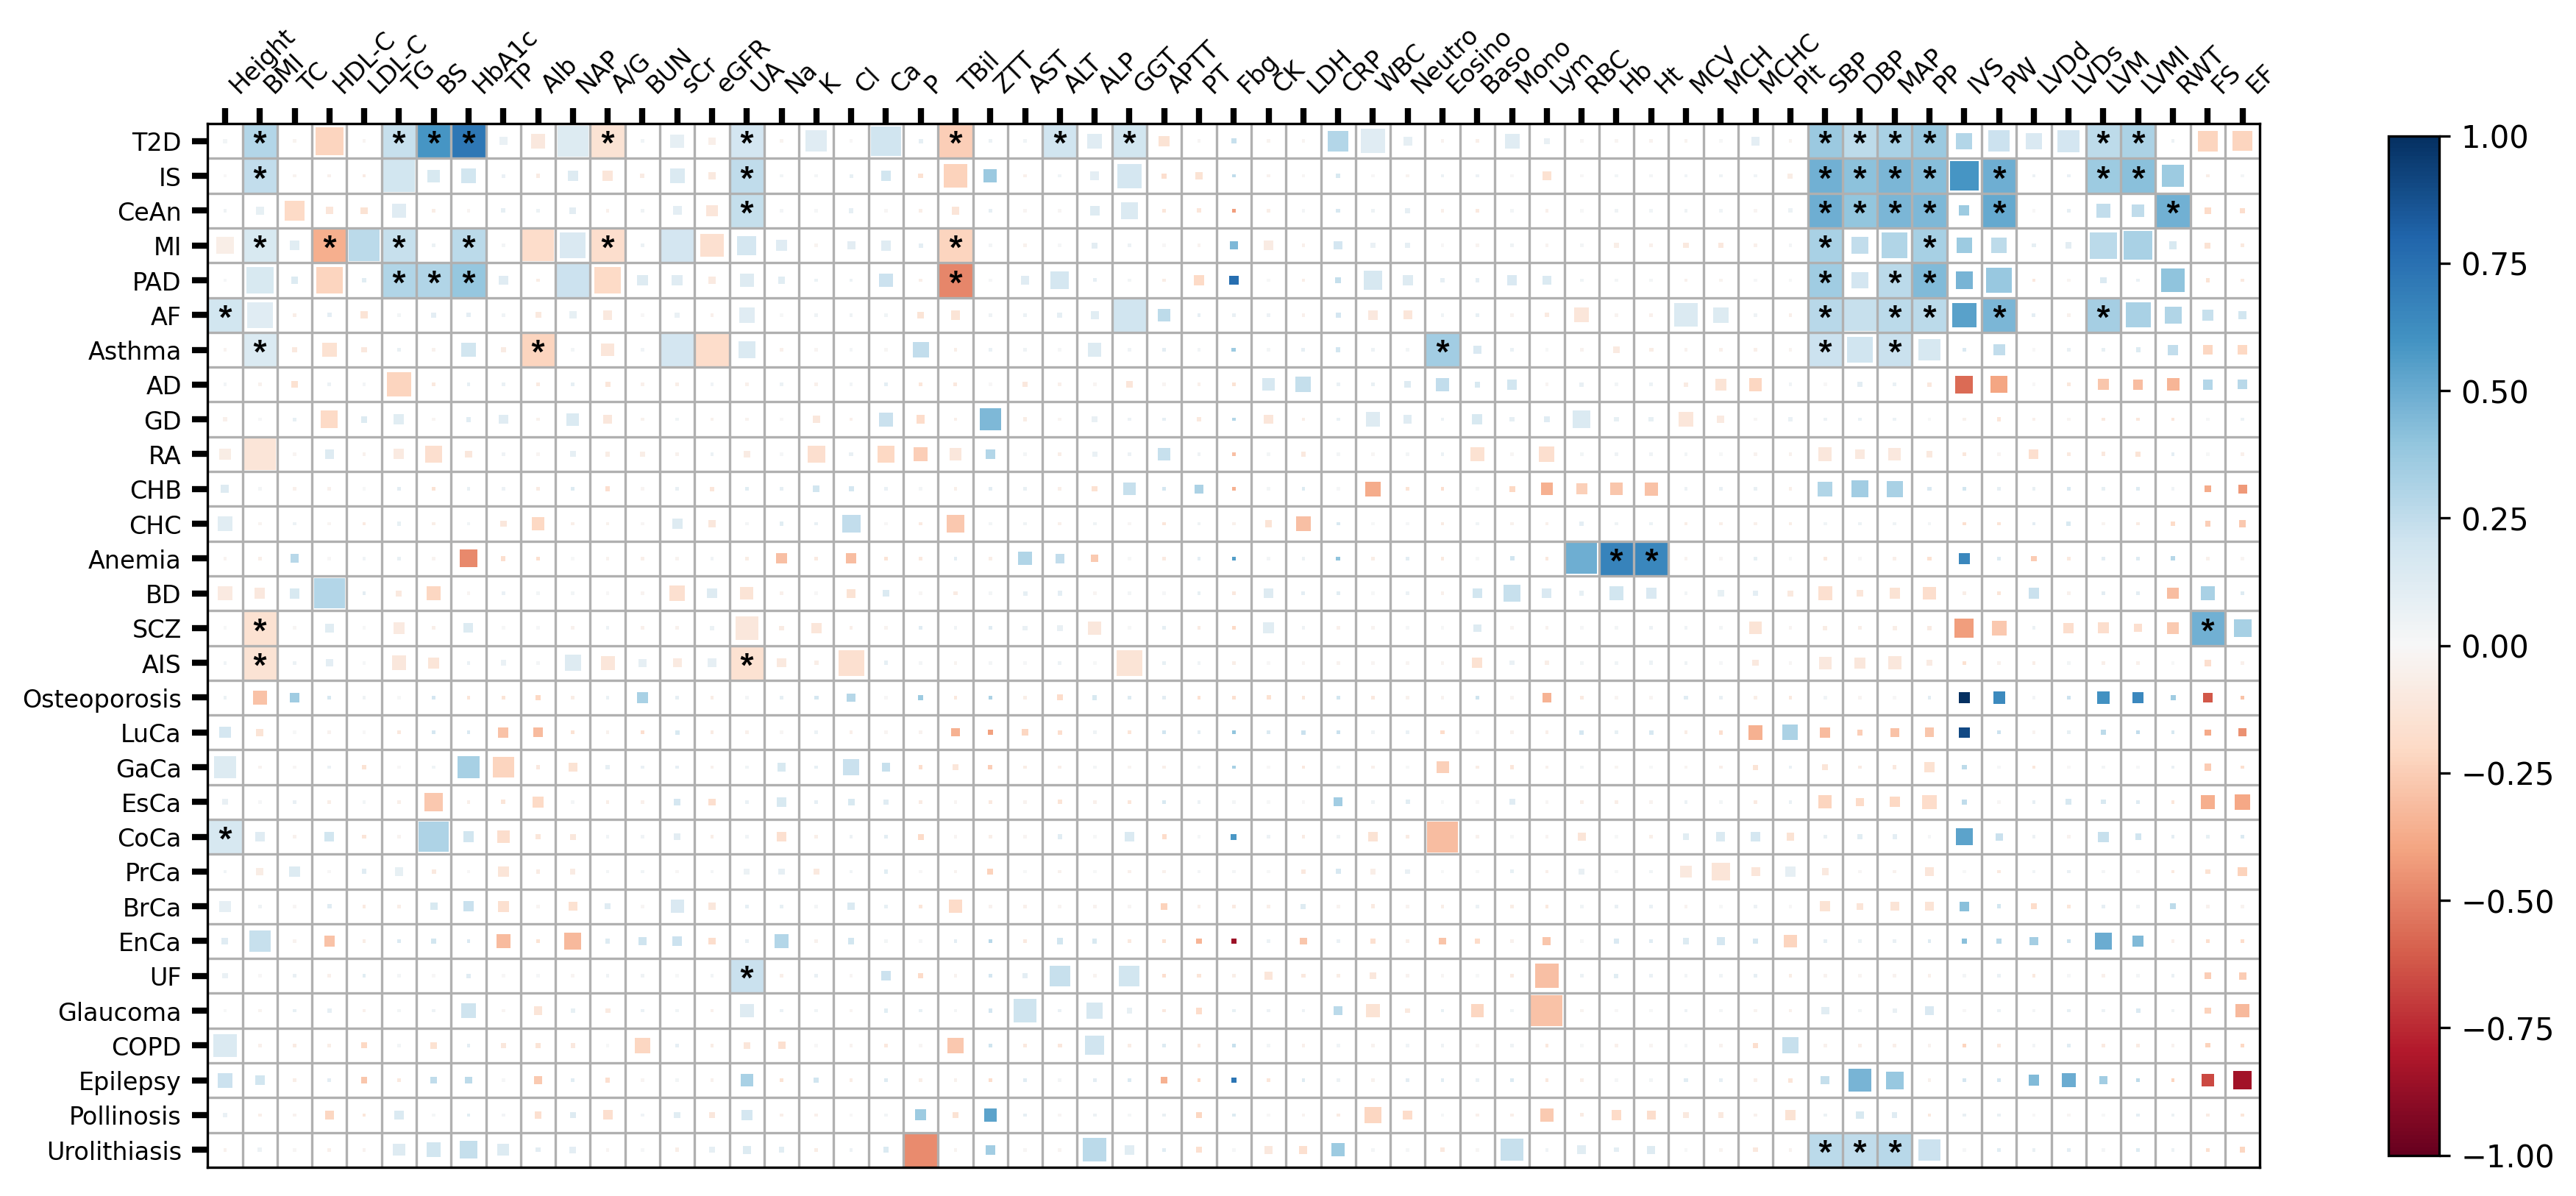

In [6]:
df = gl.plot_rg( ldsc,
            sig_levels=[0.05],
            corrections =["non"],
            p="q",
            p1="p2",
            p2="p1",
            full_cell=("non",0.05),
            panno_texts=["*"],
            fig_args={"figsize":(15,15),"dpi":300},
            colorbar_args={"shrink":0.4},
            panno_args={"size":12,"c":"black"},fdr_method="i",
            fontsize=8,
            sort_key=key
            )